In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qbstyles import mpl_style; mpl_style(dark=True)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [12]:
nb_version= "v4"

In [13]:
df_train = pd.read_csv(f'../../data/processed/df_train_{nb_version}.csv', index_col=[0])
df_test = pd.read_csv(f'../../data/processed/df_test_{nb_version}.csv', index_col=[0])
display(f'Train: {df_train.shape}', df_train.head(), f'Test: {df_test.shape}', df_test.head())

'Train: (9600, 8)'

,index,output,Ia,Ib,Ic,Va,Vb,Vc
0,5838,0,0.050606,0.219243,-0.320942,-1.360232,1.684628,-0.378794
1,7537,1,1.825039,-1.763182,-0.200615,0.016671,-0.931912,0.937934
2,2624,1,-0.522337,-1.780562,-0.266451,-0.143828,0.878640,-0.757496
3,3496,1,1.757554,-2.259983,-0.158522,-0.060336,-0.173094,0.237007
4,7634,0,-0.175755,0.130751,0.069845,1.005064,-1.476184,0.516909


'Test: (2401, 8)'

,index,output,Ia,Ib,Ic,Va,Vb,Vc
0,8405,0,-0.175295,0.152998,0.042296,0.481892,-1.570481,1.131395
1,6266,0,-0.018423,0.273829,-0.299069,-1.735688,1.307969,0.378650
2,1521,1,2.188253,0.256597,-0.118843,-0.529026,-0.032216,0.556701
3,7590,1,0.457547,-0.513066,0.037661,0.081702,-1.447867,1.401983
4,249,0,0.040440,0.191124,-0.282299,-1.519506,1.544327,-0.077430


In [18]:
X_train = df_train.drop(['index','output'], axis=1)
Y_train = df_train[['output']]
X_test = df_test.drop(['index','output'], axis=1)
Y_test = df_test[['output']]

In [20]:
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cvscores = []
training = pd.DataFrame()
for train, val in kfold.split(X_train, Y_train):
	model_ann = Sequential()
	model_ann.add(Dense(6, activation='relu', input_shape=(6,)))
	model_ann.add(Dense(6, activation='relu'))
	model_ann.add(Dense(1, activation='sigmoid'))
	model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	hist = model_ann.fit(
		X_train.iloc[train,:], Y_train.iloc[train,:], 
		validation_data=(X_train.iloc[val,:], Y_train.iloc[val,:]), 
		epochs=150, batch_size=32, verbose=0
	)
	training = pd.concat([training, pd.DataFrame(hist.history)], axis=1)
	scores = model_ann.evaluate(X_train.iloc[val,:], Y_train.iloc[val,:], verbose=0)
	print("%s: %.2f%%" % (model_ann.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1]*100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 99.08%
accuracy: 99.37%
accuracy: 99.25%
accuracy: 99.50%
99.30% (+/- 0.15%)


In [57]:
training

,loss,accuracy,val_loss,val_accuracy,loss,accuracy,val_loss,val_accuracy,loss,accuracy,val_loss,val_accuracy,loss,accuracy,val_loss,val_accuracy
0,0.617512,0.643889,0.515987,0.946250,0.725101,0.554722,0.618049,0.692083,0.585848,0.680694,0.460904,0.908750,0.653970,0.680556,0.517970,0.857917
1,0.414082,0.976250,0.338988,0.977917,0.505600,0.760417,0.402701,0.813750,0.321312,0.948194,0.238214,0.952500,0.425135,0.947222,0.316493,0.965417
2,0.292272,0.985417,0.266140,0.982083,0.355041,0.873889,0.305210,0.919167,0.188774,0.959028,0.165039,0.958750,0.259819,0.958472,0.199939,0.968750
3,0.237496,0.986111,0.223890,0.983333,0.275739,0.932917,0.231752,0.956667,0.135522,0.966528,0.126796,0.965000,0.179314,0.960833,0.144529,0.972917
4,0.201633,0.985972,0.193131,0.983333,0.188617,0.961111,0.149931,0.970417,0.105860,0.972500,0.103924,0.970000,0.135973,0.965694,0.108778,0.976667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.024378,0.992500,0.028886,0.991250,0.018273,0.992639,0.014573,0.994167,0.015298,0.993611,0.027053,0.992083,0.017421,0.993333,0.017959,0.994583
146,0.024159,0.992500,0.030007,0.991667,0.018430,0.992639,0.014871,0.994583,0.014101,0.994444,0.028434,0.991667,0.017239,0.993472,0.019050,0.993333
147,0.024063,0.992778,0.028949,0.991250,0.018185,0.992778,0.014732,0.994167,0.014954,0.993889,0.024813,0.992500,0.017188,0.993472,0.019445,0.993333
148,0.024063,0.992639,0.028743,0.991250,0.018197,0.991944,0.013812,0.994167,0.014655,0.994167,0.025285,0.992500,0.017173,0.992778,0.017898,0.995417


In [58]:
training_1 = training.iloc[:,0:4]
training_2 = training.iloc[:,4:8]
training_3 = training.iloc[:,8:12]
training_4 = training.iloc[:,12:16]

In [59]:
training_1.rename(columns=dict(zip(training_1.columns, [f"{j}_{1}" for j in training_1.columns])), inplace=True)
training_2.rename(columns=dict(zip(training_2.columns, [f"{j}_{2}" for j in training_2.columns])), inplace=True)
training_3.rename(columns=dict(zip(training_3.columns, [f"{j}_{3}" for j in training_3.columns])), inplace=True)
training_4.rename(columns=dict(zip(training_4.columns, [f"{j}_{4}" for j in training_4.columns])), inplace=True)

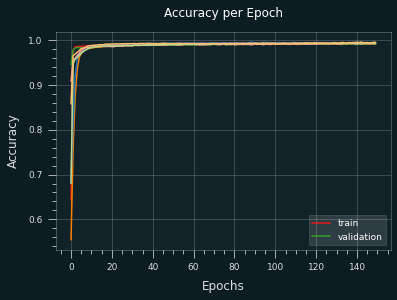

In [62]:
plt.plot(training_1['accuracy_1'])
plt.plot(training_1['val_accuracy_1'])
plt.plot(training_2['accuracy_2'])
plt.plot(training_2['val_accuracy_2'])
plt.plot(training_3['accuracy_3'])
plt.plot(training_3['val_accuracy_3'])
plt.plot(training_4['accuracy_4'])
plt.plot(training_4['val_accuracy_4'])
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

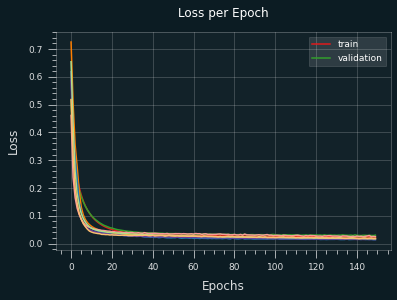

In [63]:
plt.plot(training_1['loss_1'])
plt.plot(training_1['val_loss_1'])
plt.plot(training_2['loss_2'])
plt.plot(training_2['val_loss_2'])
plt.plot(training_3['loss_3'])
plt.plot(training_3['val_loss_3'])
plt.plot(training_4['loss_4'])
plt.plot(training_4['val_loss_4'])
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

In [64]:
model_ann = Sequential()
model_ann.add(Dense(6, activation='relu', input_shape=(6,)))
model_ann.add(Dense(6, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_test = model_ann.fit(
	X_train, Y_train, 
	validation_data=(X_test, Y_test), 
	epochs=150, batch_size=32, verbose=1
)

Epoch 1/150
300/300 [==============================] - 11s 12ms/step - loss: 0.5411 - accuracy: 0.7847 - val_loss: 0.3947 - val_accuracy: 0.9096
Epoch 2/150
300/300 [==============================] - 1s 4ms/step - loss: 0.2574 - accuracy: 0.9493 - val_loss: 0.1737 - val_accuracy: 0.9546
Epoch 3/150
300/300 [==============================] - 1s 3ms/step - loss: 0.1264 - accuracy: 0.9693 - val_loss: 0.1139 - val_accuracy: 0.9646
Epoch 4/150
300/300 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.9760 - val_loss: 0.0872 - val_accuracy: 0.9725
Epoch 5/150
300/300 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9801 - val_loss: 0.0724 - val_accuracy: 0.9771
Epoch 6/150
300/300 [==============================] - 1s 3ms/step - loss: 0.0604 - accuracy: 0.9827 - val_loss: 0.0623 - val_accuracy: 0.9813
Epoch 7/150
300/300 [==============================] - 1s 3ms/step - loss: 0.0540 - accuracy: 0.9845 - val_loss: 0.0550 - val_accuracy: 0.98

In [65]:
loss_train, acc_train = model_ann.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', loss_train)
print('Train acc:', acc_train)
loss_test, acc_test = model_ann.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test acc:', acc_test)

Train loss: 0.009325657971203327
Train acc: 0.996666669845581
Test loss: 0.010188888758420944
Test acc: 0.9954185485839844


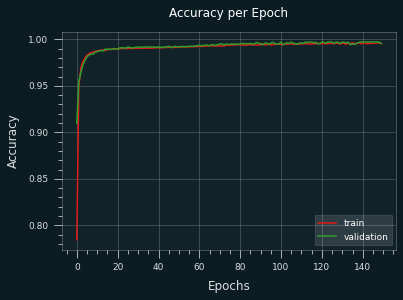

In [66]:
plt.plot(hist_test.history['accuracy'])
plt.plot(hist_test.history['val_accuracy'])
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

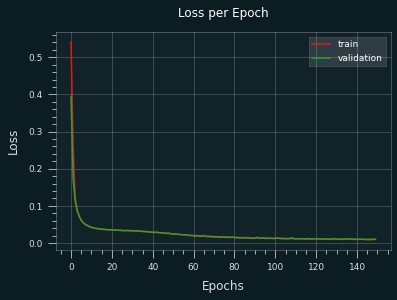

In [67]:
plt.plot(hist_test.history['loss'])
plt.plot(hist_test.history['val_loss'])
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

In [69]:
Y_train_pred = model_ann.predict(X_train)
Y_test_pred = model_ann.predict(X_test)
Y_train_pred = np.where(Y_train_pred < 0.5, 0, 1)
Y_test_pred = np.where(Y_test_pred < 0.5, 0, 1)
Y_train_pred = np.reshape(Y_train_pred, len(Y_train_pred))
Y_test_pred = np.reshape(Y_test_pred, len(Y_test_pred))
cmf_train = confusion_matrix(Y_train, Y_train_pred)
cmf_test = confusion_matrix(Y_test, Y_test_pred)
print('Train Report:\n', classification_report(Y_train, Y_train_pred, digits=5))
print('Test Report:\n', classification_report(Y_test, Y_test_pred, digits=5))

76/76 [==============================] - 0s 1ms/step
Train Report:
               precision    recall  f1-score   support

           0    0.99673   0.99712   0.99693      5204
           1    0.99659   0.99613   0.99636      4396

    accuracy                        0.99667      9600
   macro avg    0.99666   0.99663   0.99664      9600
weighted avg    0.99667   0.99667   0.99667      9600

Test Report:
               precision    recall  f1-score   support

           0    0.99387   0.99769   0.99578      1301
           1    0.99726   0.99273   0.99499      1100

    accuracy                        0.99542      2401
   macro avg    0.99557   0.99521   0.99538      2401
weighted avg    0.99543   0.99542   0.99542      2401



Text(0.5, 1.0, 'Confusion Matrix from Training Set')

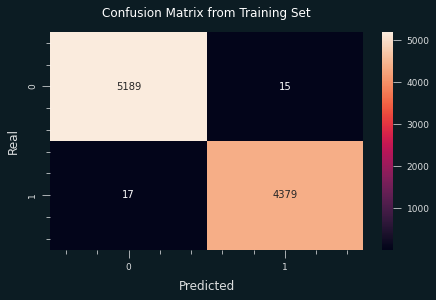

In [70]:
plt.figure(figsize=(7,4))
sns.heatmap(cmf_train, annot=True, fmt='d', linecolor='gray')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix from Training Set')

Text(0.5, 1.0, 'Confusion Matrix from Test Set')

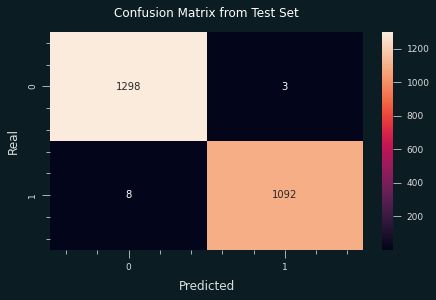

In [71]:
plt.figure(figsize=(7,4))
sns.heatmap(cmf_test, annot=True, fmt='d', linecolor='gray')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix from Test Set')